In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('Train_Data (2).csv')
test = pd.read_csv('Test_Data (3).csv')

In [ ]:
train.isna().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
test.isna().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["age_group"] = le.fit_transform(train["age_group"])

<Axes: >

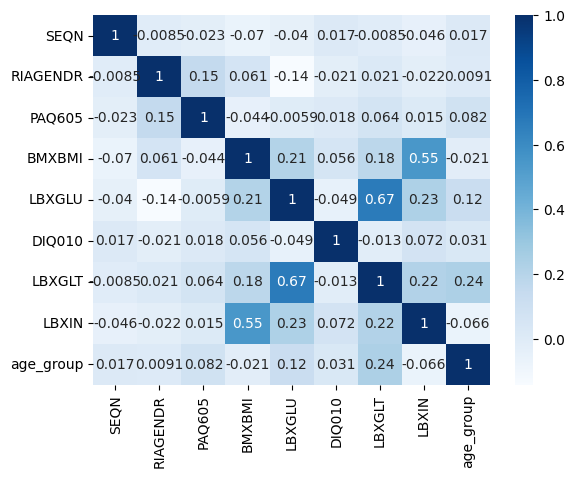

In [ ]:
sns.heatmap(train.corr(),cmap="Blues",annot=True)

In [ ]:
train.shape

(1966, 9)

In [ ]:
train.dropna().shape

(1855, 9)

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.shape

(1855, 9)

In [ ]:
train.isna().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


In [ ]:
test.shape

(312, 8)

<Axes: >

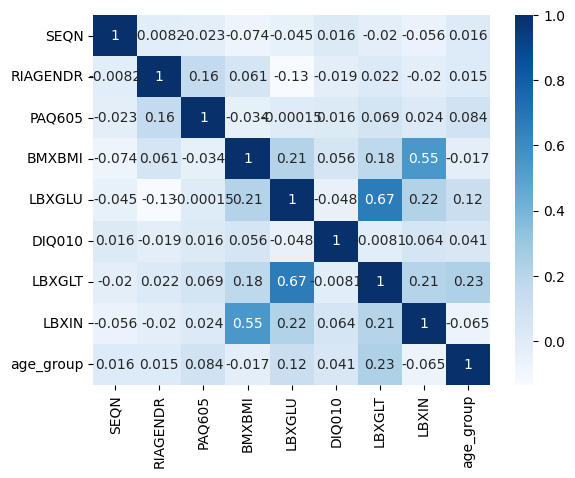

In [ ]:
sns.heatmap(train.corr(),cmap="Blues",annot=True)

In [ ]:
col = ["RIAGENDR"]
X = train.loc[:,col]
y = train["age_group"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

<Axes: >

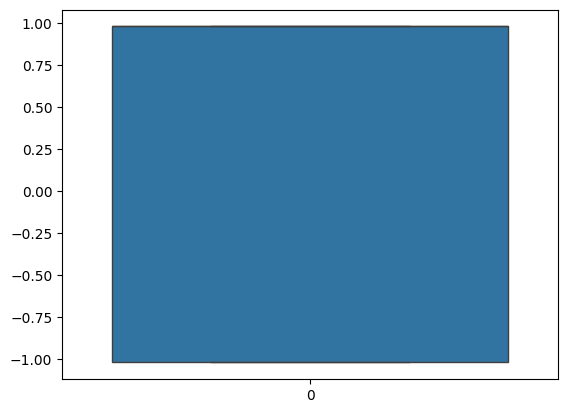

In [ ]:
sns.boxplot(X)

In [ ]:
X

,0
0,0.980249
1,0.980249
2,-1.020149
3,0.980249
4,-1.020149
...,...
1850,-1.020149
1851,0.980249
1852,-1.020149
1853,-1.020149


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
test.isna().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer()
test = pd.DataFrame(imp.fit_transform(test))

In [ ]:
test_x = test.loc[:,[1]]
test_x = pd.DataFrame(sc.transform(test_x))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
test

,0,1,2,3,4,5,6,7
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [ ]:
test_x

,0
0,-1.020149
1,0.980249
2,-1.020149
3,0.980249
4,-1.020149
...,...
307,0.980249
308,0.980249
309,0.980249
310,0.980249


### Models

In [ ]:
y_train

,age_group
1269,0
1256,0
1300,1
1329,0
463,0
...,...
721,0
1235,1
522,0
1397,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.8301886792452831

In [ ]:
f1_score(y_test,y_pred,average="weighted")

0.7531608636452052

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma="auto",kernel="rbf")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="weighted"))

0.8301886792452831
0.7531608636452052


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average="weighted"))

0.8301886792452831
0.7531608636452052


In [ ]:
result1 = svc.predict(test_x)
resutl2 = knn.predict(test_x)
result3 = rf.predict(test_x)
result1 = pd.DataFrame(result1)
result2 = pd.DataFrame(resutl2)
result3 = pd.DataFrame(result3)
result1.columns = ["age_group"]
result2.columns = ["age_group"]
result3.columns = ["age_group"]

In [ ]:
result1.to_csv("result12.csv",index=False)
result2.to_csv("result13.csv",index=False)
result3.to_csv("result14.csv",index=False)